In [ ]:
# Hello, We're going to start working with Heart Disease Dataset, You can find it here:
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data


# Here are the arributes of the dataset:

# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# target: Presence of heart disease (1 = yes, 0 = no).


# What you're to learn in this notebook:
# 1. How to load the dataset
# 2. How to explore the dataset
# 3. How to visualize the dataset

# Particularly, We will be seeing different techniques to analyze the dataset, including:
# Univariate Analysis
# Bivariate Analysis
# Multivariate Analysis



In [242]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
# Loading the dataset

df = pd.read_csv('C:\\Users\\nikrc\\OneDrive\\Desktop\\Datasets\\heart.csv')
# TO show all columns in the dataset
pd.set_option('display.max_columns',None)

# Blocking the warnings
import warnings
warnings.filterwarnings('ignore')


df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [244]:
# Before we proceed with EDA , It's necessary to understand our dataset better.

In [245]:
# Let's understand the shape of the dataset
print(f"The number of rows and columns in the dataset is: {df.shape[0], df.shape[1]}")

The number of rows and columns in the dataset is: (1025, 14)


In [246]:
# Descriptive statistics of the dataset
print("Descriptive statistics of the dataset:")
df.describe().T

Descriptive statistics of the dataset:


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [247]:
# What do we understand from the above statistics?

# The dataset contains 303 rows and 14 columns.
# The age of the patients ranges from 29 to 77 years.
# The maximum heart rate achieved is between 71 and 202.
# The target variable 'target' indicates whether a patient has heart disease (1) or not (0).

In [248]:
# What are the datatypes of the columns?

print("Datatypes of the columns:")
print(df.dtypes)

Datatypes of the columns:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [249]:
# Checking if there are any missing values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [250]:
# There are no missing values in the dataset

# Now, We can also check for duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicates}")

Number of duplicate rows in the dataset: 723


In [251]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [252]:
# Here we are going to learn about different types of analysis techniques that can be used to analyze the dataset.

# 1. Univariate Analysis:
# Analysis of a single variable to understand its distribution and basic properties.
# 2. Bivariate Analysis:
# Bivariate analysis involves analyzing the relationship between two variables in the dataset.
# 3. Multivariate Analysis:
# Multivariate analysis involves analyzing the relationship between three or more variables in the dataset.


In [253]:
# Before starting, Let's Divide the dataset into two parts:
# Numerical and Categorical features

# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Why is it important to separate numerical and categorical features?
# Because different analysis techniques are applied to numerical and categorical data.

# Different data types require different visualization techniques.

# This table would help you:

# | Data Type   | Visualization Technique |
# |-------------|-------------------------|
# | Numerical   | Histogram, Boxplot      |
# | Categorical | Bar Chart, Pie Chart    |
# | Time Series | Line Chart              |
# | Text        | Word Cloud, Bar Chart   | 


# Let's now print the numerical and categorical features
print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Categorical Features:
[]


In [254]:
# As you can see, all the features in the dataset are numerical, but age,sex and target are categorical features.
# So, we will treat them as categorical features for the purpose of analysis.

# But it will be better to convert 'sex' column to categorical type and add another target column with 'Yes' and 'No'
# We're naming that Heart Disease
df['Heart Disease'] = df['target'].apply(lambda x: "Yes" if x == 1 else "No")

df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].apply(lambda x: "M" if x == 1 else "F")


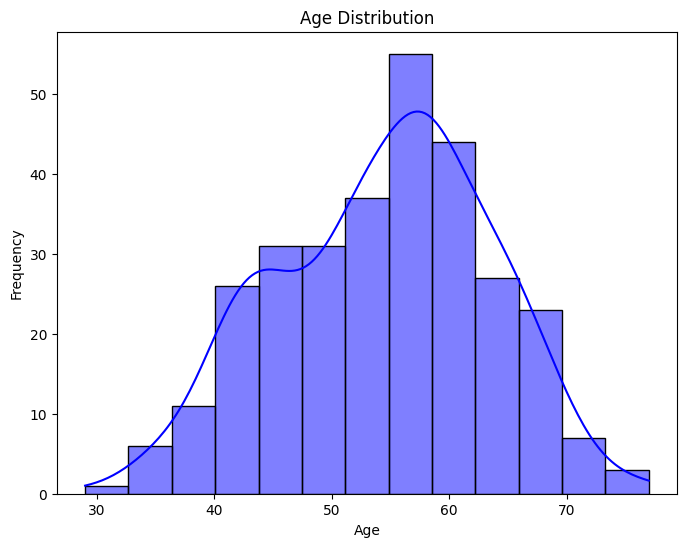

In [255]:
# Univariate Analysis

# Distribution Analysis for age (KDE or Histograms)

plt.figure(figsize=(8, 6))
sns.histplot(df['age'],kde = True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [256]:
# What can we observe from the above plot?
# The plot shows that the age distribution is slightly right-skewed, with most patients being in their 50s and 60s.
# Mostly concentrated between 40 and 60 years of age.

In [257]:
# Summary Statistics for age
age_summary = df['age'].describe()
print("Summary Statistics for Age: \n",age_summary)

mean_age = df['age'].mean()
median_age = df['age'].median()
std_deviation = df['age'].std()

print()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_deviation}")


Summary Statistics for Age: 
 count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

Mean Age: 54.420529801324506
Median Age: 55.5
Standard Deviation of Age: 9.047969746247457


In [258]:
# What can get from the above statistics?

# This indicates that the ages of the patients are generally around 54 years, with some variation.
# And the mean and median are close to each other, indicating a relatively symmetric distribution.

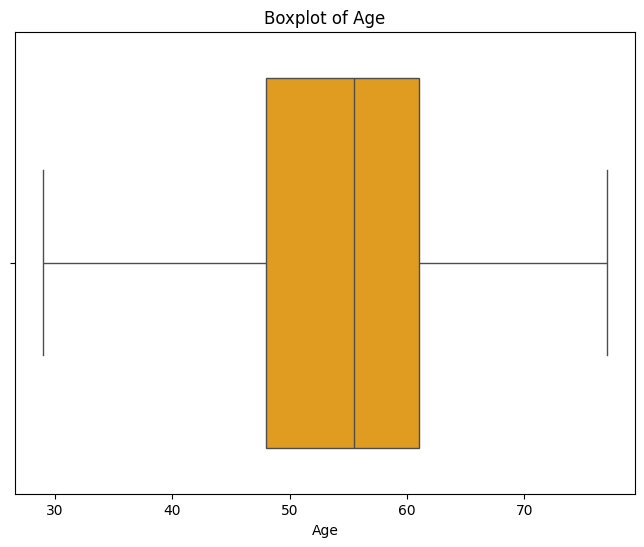

In [259]:
# Outliers in age
plt.figure(figsize=(8, 6))
sns.boxplot(x = df['age'],color = 'orange')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [260]:
# There are no outliers in the age column, as the boxplot shows no points outside the whiskers.
# You can also use the IQR method to detect outliers in the age column, but in this case, there's no need as the boxplot already shows no outliers.

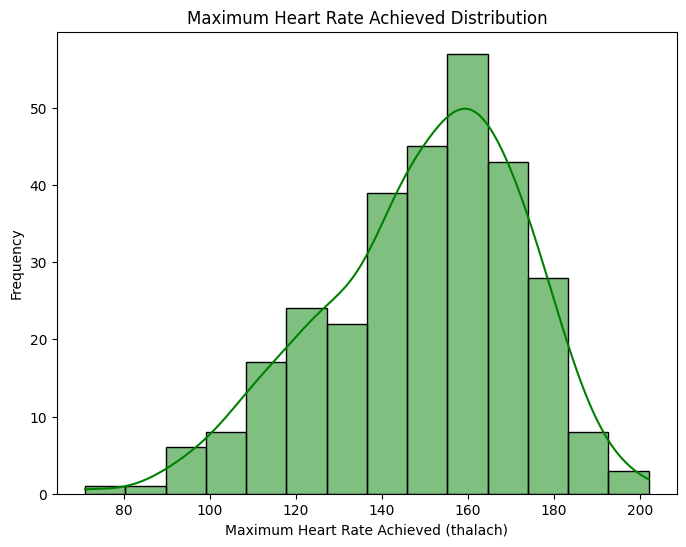

In [261]:
# Univariate Analysis for thalach
plt.figure(figsize=(8, 6))
sns.histplot(df['thalach'], kde=True, color='green')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.ylabel('Frequency')
plt.show()



In [262]:
# What can we observe from the above plot?
# The plot shows that the maximum heart rate achieved is generally between 120 and 180, with a peak around 150.

In [263]:
# Outliears in thalach

# Earlier we used boxplot , Let's use IQR method for this one 
Q1 = df['thalach'].quantile(0.25)
Q2 = df['thalach'].quantile(0.75)
IQR = Q2 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

outliers = df[(df['thalach'] < lower_bound) | (df['thalach'] > upper_bound)]
print(f"Number of outliers in thalach: {len(outliers)}")

Number of outliers in thalach: 1


In [264]:
# Here, We don't need to remove the outliers as they are not significant enough to affect the analysis.

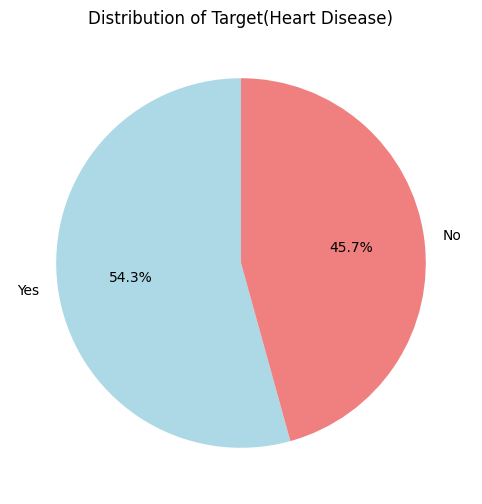

In [265]:
# Univariate Analysis for target
plt.figure(figsize=(8, 6))
df['Heart Disease'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Target(Heart Disease)')
plt.ylabel('')
plt.show()

In [266]:
# What to observe from the above plot?
# We can see that there are more patients without heart disease (No) than with heart disease (Yes).
# We can say that the dataset is imbalanced

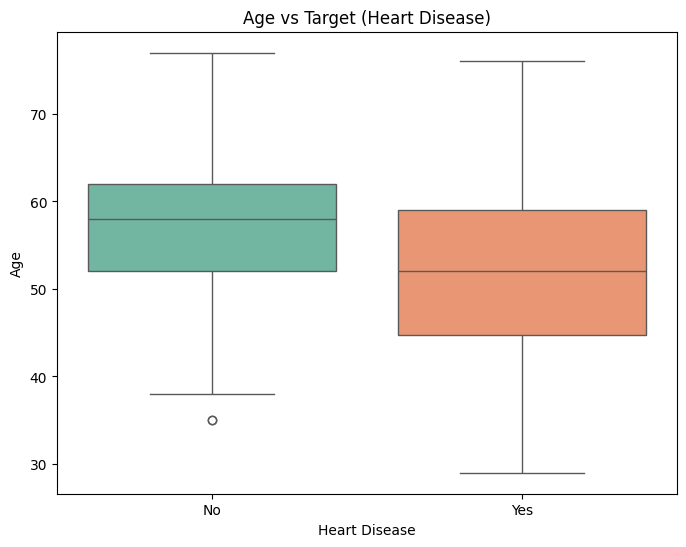

In [267]:
# Let's Now Begin with Bivariate Analysis


# Bivariate Analysis
# Bivariate analysis involves analyzing the relationship between two variables in the dataset.

# Let's start with the relationship between age and target (heart disease)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Disease', y='age', data=df, palette='Set2')
plt.title('Age vs Target (Heart Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

In [268]:
# We can se that the Individuals without heart disease tend to have a slightly higher median age compared to those with heart disease.
# also, the age distribution for individuals with heart disease is more spread out, indicating a wider range of ages.


Correlation between Age and Maximum Heart Rate Achieved (thalach): -0.40


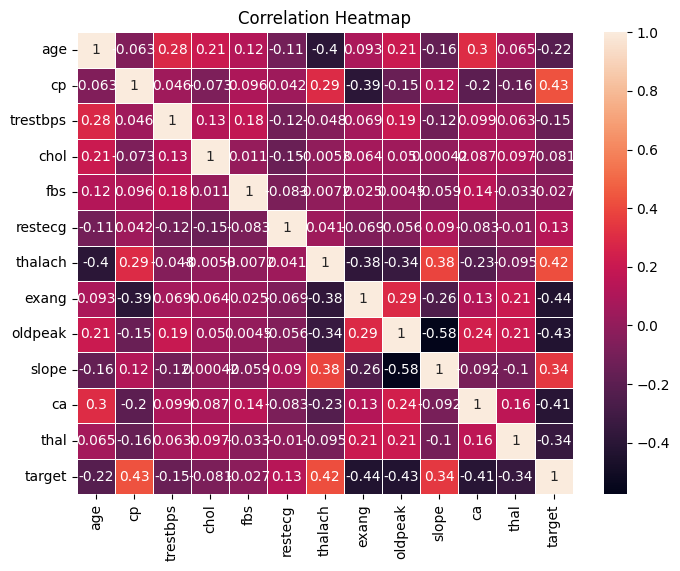

In [271]:
# Correlation Analysis

correlation = df['age'].corr(df['thalach'])
print(f"Correlation between Age and Maximum Heart Rate Achieved (thalach): {correlation:.2f}")


# First we need to extract numerical values for correlation analysis
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='rocket', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [272]:
# We can see that the highest correlation is between 'cp' (chest pain type) and 'target' (heart disease), 
# followed by 'thalach' (maximum heart rate achieved) and 'target'.

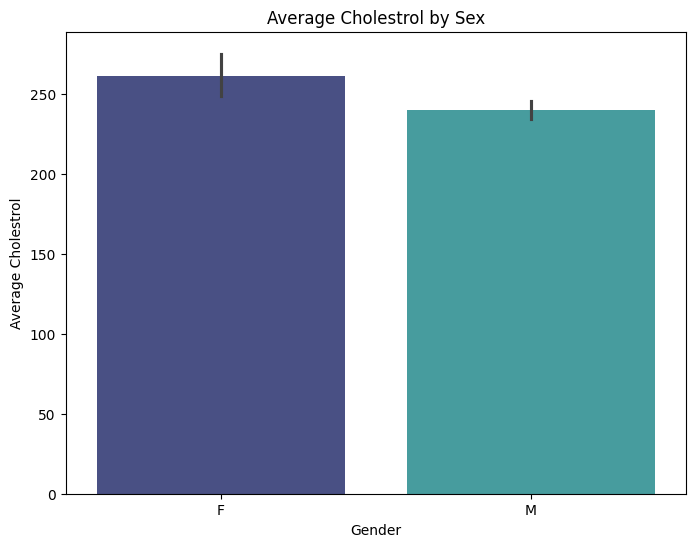

In [278]:
# Average Cholestrol by Sex

plt.figure(figsize=(8, 6))
sns.barplot(x = 'sex', y = 'chol',data=df, palette='mako')
plt.title('Average Cholestrol by Sex')
plt.xlabel("Gender")
plt.ylabel('Average Cholestrol')
plt.show()

In [284]:
# Here we can see that the average cholesterol level is slightly higher for Females compared Males.

# Further we can create a cross-tabulation
pd.crosstab(df['sex'], df['target'], margins=True)


target,0,1,All
sex,,,
F,24,72,96
M,114,92,206
All,138,164,302


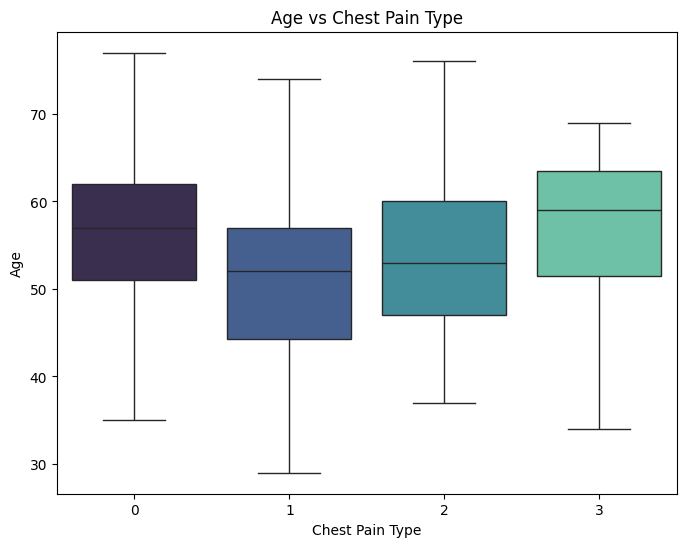

In [292]:
# Distribution for age and cp
plt.figure(figsize=(8, 6))
sns.boxplot(x='cp', y='age', data=df, palette='mako')
plt.title('Age vs Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()

In [ ]:
# We can see that chest pain type 3 has the highest median age, while chest pain type 1 has the lowest median age.
# This indicates that individuals with chest pain type 3 tend to be older compared to those with other chest pain types.

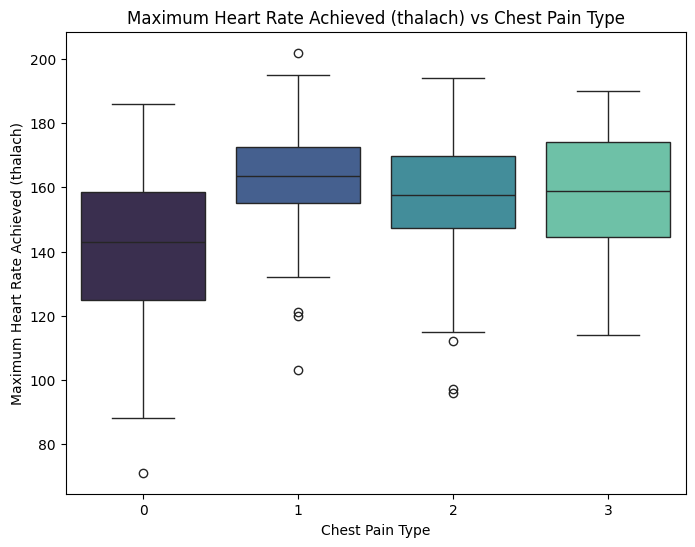

In [293]:
# Relationship between thalach and cp (chest pain type)
plt.figure(figsize=(8, 6))
sns.boxplot(x='cp', y='thalach', data=df, palette='mako')
plt.title('Maximum Heart Rate Achieved (thalach) vs Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()

In [ ]:
# We can clearly see that chest pain type 0 has the lowest median maximum heart rate achieved (thalach), while chest pain type 1 has the highest median maximum heart rate achieved (thalach).
# This indicates that individuals with chest pain type 0 tend to have lower maximum heart rates compared to those with other chest pain types.

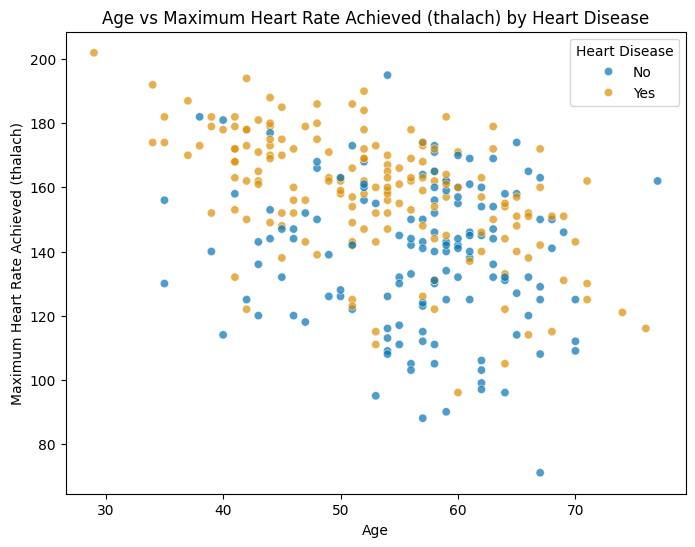

In [286]:
# Moving onto the Multivariate Analysis

# Multivariate Analysis

# Multivariate analysis involves analyzing the relationship between three or more variables in the dataset.

# Let's start with the relationship between age, thalach (maximum heart rate achieved), and target (heart disease)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', hue='Heart Disease', data = df, palette='colorblind', alpha=0.7)
plt.title('Age vs Maximum Heart Rate Achieved (thalach) by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.legend(title='Heart Disease')
plt.show()

In [ ]:
# What can we observe from the above pie chart?
# The scatter plot shows that as age increases, the maximum heart rate achieved (thalach) tends to decrease.


<Figure size 800x600 with 0 Axes>

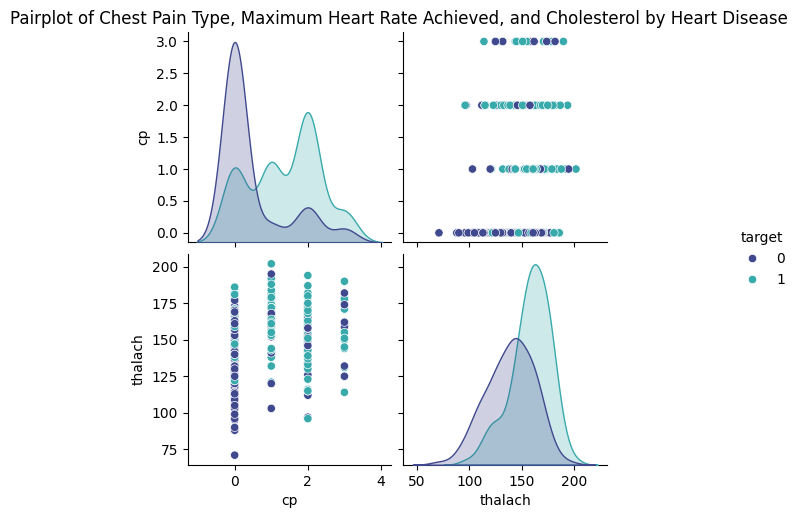

In [294]:
#  Now,let's analyze the relationship between chest pain type (cp), maximum heart rate achieved (thalach), and target (heart disease)
plt.figure(figsize=(8, 6))
sns.pairplot(df, vars=['cp', 'thalach'], hue='target', palette='mako')
plt.suptitle('Pairplot of Chest Pain Type, Maximum Heart Rate Achieved, and Cholesterol by Heart Disease', y=1.02)
plt.show()


In [ ]:
# We can see that individuals with chest pain type 0 tend to have lower maximum heart rates achieved (thalach) compared to those with other chest pain types.
# This indicates that chest pain type 0 is associated with lower maximum heart rates, while chest pain types 1, 2, and 3 are associated with higher maximum heart rates.

In [ ]:
# This marks the end of our analysis on the Heart Disease Dataset.
# We have performed univariate, bivariate, and multivariate analysis to understand the relationships between different variables in the dataset.
# We have also visualized the data using various plots to gain insights into the dataset.
# The analysis shows that age, chest pain type, and maximum heart rate achieved are important factors in determining the presence of heart disease.
# Thank you for reading this notebook, I hope you found it helpful.

# If you have any questions or suggestions, feel free to reach out.
# Happy Learning!